# 1. TextBlob

## 1.1 Create a TextBlob

In [1]:
from textblob import TextBlob

In [2]:
text = 'Today is a beautiful day. Tomorrow looks like bad weather.'
text

'Today is a beautiful day. Tomorrow looks like bad weather.'

In [3]:
blob = TextBlob(text)

In [4]:
blob

TextBlob("Today is a beautiful day. Tomorrow looks like bad weather.")

### `TextBlob`, `Sentence`s and `Word`s Support String Methods and Comparisons 
* `Sentence`s, `Word`s and `TextBlob`s inherit from **`BaseBlob`**, which defines many common methods and properties
* [**`BaseBlob` documentation**](https://textblob.readthedocs.io/en/dev/api_reference.html)

## 1.2 Tokenizing Text into Sentences and Words
* Getting a list of sentences

In [7]:
import nltk
nltk.download('punkt')
blob.sentences

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Phillip\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


[Sentence("Today is a beautiful day."),
 Sentence("Tomorrow looks like bad weather.")]

* A `WordList` is a subclass of Python’s **built-in list type** with additional NLP methods. 
* Contains TextBlob `Word` objects

In [6]:
blob.words

WordList(['Today', 'is', 'a', 'beautiful', 'day', 'Tomorrow', 'looks', 'like', 'bad', 'weather'])

## 1.3 Parts-of-Speech Tagging

* Evaluate words based on context to determine **parts of speech**, which can help determine meaning
* Eight primary English parts of speech
	* **nouns**, **pronouns**, **verbs**, **adjectives**, **adverbs**, **prepositions**, **conjunctions** and **interjections** (words that express emotion and that are typically followed by **punctuation**, like “Yes!” or “Ha!”) 
    * Many subcategories 
* Some words have multiple meanings
	* E.g., “set” and “run” have **hundreds of meanings** each! 

In [8]:
blob

TextBlob("Today is a beautiful day. Tomorrow looks like bad weather.")

In [9]:
import nltk

nltk.download('averaged_perceptron_tagger')
blob.tags  #tags property returns list of tuples (word, string representing part-of-speech tag)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Phillip\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


[('Today', 'NN'),
 ('is', 'VBZ'),
 ('a', 'DT'),
 ('beautiful', 'JJ'),
 ('day', 'NN'),
 ('Tomorrow', 'NNP'),
 ('looks', 'VBZ'),
 ('like', 'IN'),
 ('bad', 'JJ'),
 ('weather', 'NN')]

## 1.3 Parts-of-Speech Tagging (cont.)
* `TextBlob` uses a `PatternTagger` to determine parts-of-speech
* Uses [**pattern library**](https://www.clips.uantwerpen.be/pattern) POS tagging
* Pattern's [63 parts-of-speech tags](https://www.clips.uantwerpen.be/pages/MBSP-tags`)
* In preceding output:
    * `NN`—a **singular noun** or **mass noun**
    * `VBZ`—a [**third person singular present verb**](https://www.grammar.cl/Present/Verbs_Third_Person.htm)
    * `DT`—a [**determiner**](https://en.wikipedia.org/wiki/Determiner) (the, an, that, this, my, their, etc.)
    * `JJ`—an **adjective**
    * `NNP`—a **proper singular noun**
    * `IN`—a **subordinating conjunction** or **preposition**

## 1.4 Extracting Noun Phrases
* Preparing to purchase a **water ski**
* Might search for **“best water ski”**—**“water ski”** is a **noun phrase** 
* For best results, search engine must parse the noun phrase properly 
* Try searching for **“best water,”** **“best ski”**,  **“water ski”** and **“best water ski”** and see what you get 

In [10]:
blob

TextBlob("Today is a beautiful day. Tomorrow looks like bad weather.")

In [11]:
import nltk
nltk.download('brown')
blob.noun_phrases

[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\Phillip\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\brown.zip.


WordList(['beautiful day', 'tomorrow', 'bad weather'])

In [12]:
for np in blob.noun_phrases:
    print(np)

beautiful day
tomorrow
bad weather


* A **`Word`** can represent a noun phrase with **multiple words**. 

## 1.5 Sentiment Analysis with TextBlob’s Default Sentiment Analyzer
* Determines whether text is **positive**, **neutral** or **negative**. 
* One of the most common and valuable NLP tasks (several later case studies do it) 
* Consider the **positive word “good”** and the **negative word “bad"**
    * Alone they are positive and negative, respectively, but...
    * **The food is not good** — clearly has negative sentiment
    * **The movie was not bad** — clearly has positive sentiment (but not as positive as **The movie was excellent!**)
* Complex **machine-learning problem**, but libraries like TextBlob can do it for you

### Getting the Sentiment of a TextBlob

In [13]:
blob

TextBlob("Today is a beautiful day. Tomorrow looks like bad weather.")

In [14]:
blob.sentiment # property showing whether text is +ve or -ve and whether it's objective or subjective.

Sentiment(polarity=0.07500000000000007, subjectivity=0.8333333333333333)

* **`polarity`** is the **sentiment** — from **`-1.0` (negative)** to **`1.0` (positive)** with **`0.0`** being **neutral**. 
* **`subjectivity`** is a value from **0.0 (objective)** to **1.0 (subjective)**. 

### Getting the polarity and subjectivity from the Sentiment Object
* **`%precision`** magic specifies the **default precision** for **standalone** `float` objects and `float` objects in **built-in types** like lists, dictionaries and tuples:

In [15]:
%precision 3

'%.3f'

In [16]:
blob.sentiment.polarity

0.075

In [17]:
blob.sentiment.subjectivity

0.833

### Getting the Sentiment of a Sentence 
* One is **positive (`0.85`)** and one is **negative (`-0.6999999999999998`)**, which might explain why the entire `TextBlob`’s `sentiment` was close to **`0.0` (neutral)**

In [18]:
for sentence in blob.sentences:
    print(sentence.sentiment)

Sentiment(polarity=0.85, subjectivity=1.0)
Sentiment(polarity=-0.6999999999999998, subjectivity=0.6666666666666666)


### ***Practice Q1. Import Sentence from TextBlob module then make Sentence objects to check the sentiments of the following statements.
* "The food is not good"
* "The movie was not bad"
* "The movie was Excellent"

In [19]:
#Your Code here
#Solution
from textblob import Sentence
Sentence('The food is not good.').sentiment

Sentiment(polarity=-0.35, subjectivity=0.6000000000000001)

In [20]:
Sentence('The movie was not bad.').sentiment

Sentiment(polarity=0.3499999999999999, subjectivity=0.6666666666666666)

In [21]:
Sentence('The movie was Excellent.').sentiment

Sentiment(polarity=1.0, subjectivity=1.0)

## 1.6 Sentiment Analysis with the NaiveBayesAnalyzer 

* By default, a TextBlob and the Sentences and Words we get from it determine sentiment using a PatternAnalyzer, which uses the sentiment analysis techniques in Pattern Library.
* Naive Bayes - ML text-classification algorithm. 
* NaiveBayesAnalyzer (module textblob.sentiments), which was trained on a db of movie reviews.  

In [28]:
from textblob.sentiments import NaiveBayesAnalyzer

In [29]:
text='The food is not good. The movie was not bad. The movie was excellent!'
blob = TextBlob(text, analyzer=NaiveBayesAnalyzer())

In [30]:
blob

TextBlob("The food is not good. The movie was not bad. The movie was excellent!")

In [27]:
import nltk
nltk.download('movie_reviews')
blob.sentiment

[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\Phillip\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\movie_reviews.zip.


Sentiment(classification='pos', p_pos=0.7318278242290406, p_neg=0.26817217577095936)

In [31]:
for sentence in blob.sentences:
    print(sentence.sentiment)

Sentiment(classification='pos', p_pos=0.509829537403983, p_neg=0.4901704625960168)
Sentiment(classification='neg', p_pos=0.31118417624529743, p_neg=0.6888158237547024)
Sentiment(classification='pos', p_pos=0.7318278242290406, p_neg=0.26817217577095936)


### ***Practice Q2. Check the sentiment of the sentence 'The movie was excellent!' using NaiveBayesAnalyzer

In [32]:
#Your Code here
#Solution
text = ('The movie was excellent!')
exblob = TextBlob(text, analyzer=NaiveBayesAnalyzer())
exblob.sentiment

Sentiment(classification='pos', p_pos=0.7318278242290406, p_neg=0.26817217577095936)

## 1.7 Language Detection and Translation
* **Google Translate**, **Microsoft Bing Translator** and others can translate between scores of languages instantly
* Now working on **near-real-time translation**
    * Converse in real time with people who do not know your natural language
* In the **IBM Watson** presentation, we'll develop a script that does **inter-language translation**

In [ ]:
blob

In [ ]:
blob.detect_language()

In [ ]:
spanish = blob.translate(to='es')

In [ ]:
spanish

In [ ]:
spanish.detect_language()

In [ ]:
chinese = blob.translate(to='zh')

In [ ]:
chinese

In [ ]:
chinese.detect_language()

* Can **specify a source language** explicitly by passing the `from_lang` keyword argument to the `translate` method

> ```python
chinese = blob.translate(from_lang='en', to='zh')
```

* `from_lang` and `to` use [iso-639-1 language codes](https://en.wikipedia.org/wiki/List_of_ISO_639-1_codes)
* [Google Translate’s list of supported languages](https://cloud.google.com/translate/docs/languages)

In [ ]:
spanish.translate()

In [ ]:
chinese.translate() 

* **Note the slight difference in the English results.**

### ***Practice Q3. Translate 'The movie was excellent!' into French and detect the language

In [ ]:
#Your Code here
#Solution:
blob = TextBlob('The movie was excellent!')
french = blob.translate(to='fr')
french

In [ ]:
french.detect_language()

## 1.8 Inflection: Pluralization and Singularization
* Inflections are different forms of the same words, such as singular and plural (like “person” and “people”) and different verb tenses (like “run” and “ran”)
* When you’re calculating word frequencies, you might first want to convert all inflected words to the same form for more accurate word frequencies

In [33]:
from textblob import Word

In [34]:
index = Word('index')

In [35]:
index.pluralize()

'indices'

In [36]:
cacti = Word('cacti')

In [37]:
cacti.singularize()

'cactus'

* Pluralizing and singularizing are not as simple as adding or removing an “s” or “es” at the end of a word

In [38]:
from textblob import TextBlob

In [39]:
animals = TextBlob('dog cat fish bird').words

In [40]:
animals.pluralize()

WordList(['dogs', 'cats', 'fish', 'birds'])

### ***Practice Q3. Singularize the word 'children' and pluralize 'focus'

In [41]:
#Your code here
#Solution
from textblob import Word
Word('Children').singularize()

'child'

In [42]:
Word('focus').pluralize()

'foci'

## 1.9 Spell Checking and Correction
* For natural language processing tasks, it’s important that the text be free of spelling errors
* A `Word`’s **`spellcheck` method** returns a list of tuples containing **possible correct spellings** and **confidence values**
* Assume we meant to type “they” but misspelled it as “theyr”

In [43]:
from textblob import Word

In [44]:
word = Word('theyr')

In [45]:
word.spellcheck()

[('they', 0.571), ('their', 0.429)]

In [46]:
word.correct()  # chooses word with the highest confidence value

'they'

* Word with the highest confidence value might not be the correct word for the given context
* `TextBlob`s, `Sentence`s and `Word`s all have a `correct` method that you can call to correct spelling
* Calling `correct` on a `Word` returns the correctly spelled word that has the highest confidence value

In [47]:
from textblob import TextBlob

sentence = TextBlob('Ths sentense has missplled wrds yo.')

sentence.correct()

TextBlob("The sentence has misspelled words to.")

## 1.10 Normalization: Stemming and Lemmatization
* **Stemming** removes a **prefix** or **suffix** from a word leaving only a **stem**, which **may or may not be a real word**
* **Lemmatization** is similar, but factors in the word’s **part of speech** and **meaning** and results in a **real word**
* Both **normalize** words for analysis
	* Before calculating statistics on words in a body of text, you might convert all words to lowercase so that capitalized and lowercase words are not treated differently. 
* You might want to use a word’s root to represent the word’s many forms. 
	* E.g., treat "program" and "programs" as "program"

In [48]:
from textblob import Word
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Phillip\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


True

In [49]:
word = Word('varieties')

In [50]:
word.stem()

'varieti'

In [51]:
word.lemmatize()

'variety'

**NOTE: Before running this notebook, place a copy of your downloaded RomeoAndJuliet.txt file in the same folder with this notebook.**

## 1.11 Word Frequencies
* Various techniques for detecting **similarity between documents** rely on **word frequencies**
* `TextBlob` can count word frequencies for you
* When you read a file with `Path`’s `read_text` method, it closes the file immediately after it finishes reading the file

In [52]:
from pathlib import Path

In [53]:
from textblob import TextBlob

In [54]:
blob = TextBlob(Path('RomeoAndJuliet.txt').read_text())

* Access the word frequencies through the `TextBlob`’s `word_counts` dictionary

In [55]:
blob.word_counts['juliet']

178

In [56]:
blob.word_counts['romeo']

299

In [57]:
blob.word_counts['thou']

277

* If you already have tokenized a `TextBlob` into a `WordList`, you can count specific words in the list via the `count` method

In [58]:
blob.words.count('joy')

14

In [59]:
blob.noun_phrases.count('lady capulet')

46

## 1.12 Deleting Stop Words
* Common words that are often removed before analysis because they do not provide useful information
* Returned by the NLTK `stopwords` module’s [`words` function](https://www.nltk.org/book/ch02.html)

| NLTK’s English stop words list
| :---
| `['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', 'her', 'here', 'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in', 'into', 'is', 'isn', "isn't", 'it', "it's", 'its', 'itself', 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she', "she's", 'should', "should've", 'shouldn', "shouldn't", 'so', 'some', 'such', 't', 'than', 'that', "that'll", 'the', 'their', 'theirs', 'them', 'themselves', 'then', 'there', 'these', 'they', 'this', 'those', 'through', 'to', 'too', 'under', 'until', 'up', 've', 'very', 'was', 'wasn', "wasn't", 'we', 'were', 'weren', "weren't", 'what', 'when', 'where', 'which', 'while', 'who', 'whom', 'why', 'will', 'with', 'won', "won't", 'wouldn', "wouldn't", 'y', 'you', "you'd", "you'll", "you're", "you've", 'your', 'yours', 'yourself', 'yourselves']` 

* NLTK has lists of stop words for several other natural languages as well
* Before using, you must download them

In [60]:
import nltk

nltk.download('stopwords')

from nltk.corpus import stopwords

stops = stopwords.words('english')

from textblob import TextBlob

blob = TextBlob('Today is a beautiful day.')

[word for word in blob.words if word not in stops]

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Phillip\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


['Today', 'beautiful', 'day']

## 1.13 n-grams 
* [**n-gram**](https://en.wikipedia.org/wiki/N-gram) &mdash; a sequence of **n** text items, such as letters in words or words in a sentence. A form of co-occurence in which words or letters appear near each other in a body of text
* Used to identify letters or words that frequently appear adjacent to one another
    * **Predictive text input**
    * **Speech-to-text**

In [61]:
from textblob import TextBlob

In [62]:
text = 'Today is a beautiful day. Tomorrow looks like bad weather.'

In [63]:
blob = TextBlob(text)

* `TextBlob`’s `ngrams` method produces a list of `WordList` n-grams of length three by default—known as trigrams
* Use keyword argument `n` to produce n-grams of any desired length
* For speech-to-text n-grams help improve the quality of transcription.

In [64]:
blob.ngrams()

[WordList(['Today', 'is', 'a']),
 WordList(['is', 'a', 'beautiful']),
 WordList(['a', 'beautiful', 'day']),
 WordList(['beautiful', 'day', 'Tomorrow']),
 WordList(['day', 'Tomorrow', 'looks']),
 WordList(['Tomorrow', 'looks', 'like']),
 WordList(['looks', 'like', 'bad']),
 WordList(['like', 'bad', 'weather'])]

In [65]:
blob.ngrams(n=5)

[WordList(['Today', 'is', 'a', 'beautiful', 'day']),
 WordList(['is', 'a', 'beautiful', 'day', 'Tomorrow']),
 WordList(['a', 'beautiful', 'day', 'Tomorrow', 'looks']),
 WordList(['beautiful', 'day', 'Tomorrow', 'looks', 'like']),
 WordList(['day', 'Tomorrow', 'looks', 'like', 'bad']),
 WordList(['Tomorrow', 'looks', 'like', 'bad', 'weather'])]

# 2 Visualizing Word Frequencies with Bar Charts and Word Clouds
* Can enhance your corpus analyses
    * A **bar chart** **quantitatively** visualizes the top n words in Romeo and Juliet as bars representing each word and its frequency.
    * A **word cloud** **qualitatively** visualizes more frequently occurring words in larger fonts and less frequently occurring words in smaller fonts.

## 2.1 Visualizing Word Frequencies with Pandas
* Visualize **Romeo and Juliet**’s top 20 words that are **not stop words**, using features from **TextBlob**, **NLTK** and **pandas**. 
* Pandas visualization capabilities are based on Matplotlib, so launch IPython with the following command for this session:
>```
ipython --matplotlib
```

* Or enable matplotlib in Jupyter

In [66]:
%matplotlib inline

### Loading the Data

In [67]:
from pathlib import Path

In [68]:
from textblob import TextBlob

In [69]:
blob = TextBlob(Path('RomeoAndJuliet.txt').read_text())

* Load NLTK stop words

In [70]:
from nltk.corpus import stopwords

In [71]:
stop_words = stopwords.words('english')

### Getting the Word Frequencies
* Get word frequency tuples

In [72]:
items = blob.word_counts.items()

### Eliminating the Stop Words
* The expression `item[0]` gets the word from each tuple so we can check whether it’s in `stop_words`

In [73]:
items = [item for item in items if item[0] not in stop_words]

### Sorting the Words by Frequency
* Sort the tuples in items in descending order by frequency
* To specify the tuple element to sort by, use the `itemgetter` function from the Python Standard Library’s `operator` module

In [74]:
from operator import itemgetter

In [75]:
sorted_items = sorted(items, key=itemgetter(1), reverse=True) #access elements at index 1 in each tuple
sorted_items

[('romeo', 299),
 ('thou', 277),
 ('juliet', 178),
 ('thy', 170),
 ('nurse', 149),
 ('capulet', 141),
 ('thee', 138),
 ('love', 137),
 ('shall', 110),
 ('lady', 109),
 ('friar', 104),
 ('come', 94),
 ('mercutio', 83),
 ('good', 81),
 ('benvolio', 79),
 ('enter', 75),
 ('go', 75),
 ('iâ€™ll', 71),
 ('tybalt', 70),
 ('death', 69),
 ('night', 68),
 ('lawrence', 67),
 ('man', 66),
 ('”', 65),
 ('hath', 64),
 ('one', 60),
 ('paris', 58),
 ('well', 58),
 ('sir', 57),
 ('art', 55),
 ('would', 54),
 ('say', 52),
 ('scene', 51),
 ('may', 48),
 ('dead', 48),
 ('doth', 47),
 ('give', 47),
 ('yet', 47),
 ('montague', 45),
 ('day', 45),
 ('fair', 44),
 ('let', 44),
 ('tell', 44),
 ('upon', 42),
 ('take', 40),
 ('â€™tis', 40),
 ('must', 40),
 ('â€', 40),
 ('make', 40),
 ('like', 38),
 ('prince', 37),
 ('much', 37),
 ('see', 36),
 ('know', 35),
 ('first', 34),
 ('exeunt', 34),
 ('sweet', 34),
 ('gone', 33),
 ('house', 32),
 ('exit', 32),
 ('time', 32),
 ('servant', 31),
 ('look', 31),
 ('ay', 30),
 (

### Getting the Top 20 Words
* `TextBlob` tokenizaton splits all **contractions** at their **apostrophes** and **counts** the total number of **apostrophes** as one of the “words” 
* **Romeo and Juliet** has many contractions
    * If you display `sorted_items[0]`, you’ll see that they are the most frequently occurring “word” with `867` of them
    * (In some **locales** this does not happen and element 0 is indeed `'romeo'`) 
    * We ignore element `0` 

In [76]:
top20 = sorted_items[1:21]

### Convert top20 to a DataFrame 

In [77]:
import pandas as pd

In [78]:
df = pd.DataFrame(top20, columns=['word', 'count'])  

In [79]:
df

,word,count
0,thou,277
1,juliet,178
2,thy,170
3,nurse,149
4,capulet,141
5,thee,138
6,love,137
7,shall,110
8,lady,109
9,friar,104


### Visualizing the DataFrame 
* **`bar` method** of the `DataFrame`’s **`plot` property** creates and displays a **Matplotlib bar chart**

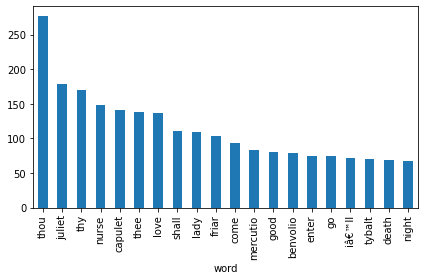

In [80]:
axes = df.plot.bar(x='word', y='count', legend=False)

import matplotlib.pyplot as plt

plt.gcf().tight_layout()

## 2.2 Visualizing Word Frequencies with Word Clouds 
* (Word cloud: graphic that shows more frequently occuring words in bigger fonts and less frequently occuring words in smllaer fonts)
* Open source [**`wordcloud` module’s**](https://github.com/amueller/word_cloud) **`WordCloud` class** 
* Uses matplotlib under the hood

### Installing the wordcloud Module
* `conda install -c conda-forge wordcloud`
    * Windows users should **run the Anaconda Prompt as an Administrator**

### Loading the Text

In [81]:
from pathlib import Path

In [82]:
text = Path('RomeoAndJuliet.txt').read_text()

### Loading the Mask Image that Specifies the Word Cloud’s Shape
* `WordCloud` fills non-white areas of a mask image with text
* Load the mask using the **`imread` function** from the `imageio` module that comes with Anaconda

In [83]:
import imageio

In [84]:
mask_image = imageio.imread('mask_heart.png')

FileNotFoundError: No such file: 'C:\Users\Phillip\mask_heart.png'

### Configuring the WordCloud Object
* 400-by-200 pixels, unless you specify **`width`** and **`height`**
* If you specify a mask image without `width` and `height`, `WordCloud` uses the image’s size
* `WordCloud` assigns **random colors** from a **color map**
* [Matplotlib’s named color maps](https://matplotlib.org/examples/color/colormaps_reference.html)
* [Complete list of `WordCloud`’s keyword arguments](http://amueller.github.io/word_cloud/generated/wordcloud.WordCloud.html)

In [ ]:
from wordcloud import WordCloud   

In [ ]:
wordcloud = WordCloud(width=1000, height=1000, 
    colormap='prism', mask=mask_image, background_color='white')

### Generating the Word Cloud
* `WordCloud`’s `generate` method receives the text to use in the word cloud as an argument and creates the word cloud, which it returns as a `WordCloud` object

In [ ]:
wordcloud = wordcloud.generate(text)

* **removes stop words** from the `text` argument, using the `wordcloud` module’s built-in stop-words list
* **calculates the word frequencies** for the remaining words
* **builds the cloud** with a **maximum of 200 words by default**, but can specify **`max_words` keyword argument**

### Saving the Word Cloud as an Image File

In [ ]:
wordcloud = wordcloud.to_file('RomeoAndJulietHeart.png')

### Generating a Word Cloud from a Dictionary
* If you have a dictionary of word counts, `WordCloud`’s **`fit_words` method** can create a word cloud from it, but does not remove the stop words from the dictionary

### Displaying the Image with Matplotlib

In [ ]:
%matplotlib inline

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plt.imshow(wordcloud)

![RomeoAndJulietHeart.png](./RomeoAndJulietHeart.png)

### ***Practice Q2. Generate a word cloud of star mask